In [1]:
import pandas as pd

In [149]:
features_df = pd.read_csv('speech_features_train.csv')
valid_features_df = pd.read_csv('speech_features_valid.csv')
test_features_df = pd.read_csv('speech_features_test.csv')

In [38]:
features_df.reset_index(inplace=True)
features_df.drop(['index'], axis=1, inplace=True)

In [4]:
valid_features_df.reset_index(inplace=True)
valid_features_df.drop(['index'], axis=1, inplace=True)

In [5]:
features_df = features_df.dropna()
X1 = features_df.drop(['da_tag'], axis=1)
X = X1[['F0semitoneFrom27.5Hz_sma3nz_amean', 'F0semitoneFrom27.5Hz_sma3nz_stddevNorm', 'loudness_sma3_amean', 'loudness_sma3_percentile20.0', 'loudness_sma3_percentile50.0', 'loudness_sma3_percentile80.0', 'spectralFlux_sma3_amean', 'mfcc1_sma3_amean', 'mfcc2_sma3_amean', 'VoicedSegmentsPerSec', 'MeanVoicedSegmentLengthSec', 'jitterLocal_sma3nz_amean', 'shimmerLocaldB_sma3nz_amean', 'HNRdBACF_sma3nz_amean', 'logRelF0-H1-H2_sma3nz_amean', 'F1frequency_sma3nz_amean', 'F2frequency_sma3nz_amean', 'F3frequency_sma3nz_amean', 'alphaRatioV_sma3nz_amean', 'hammarbergIndexV_sma3nz_amean']]
y = features_df["da_tag"]


In [6]:
valid_features_df = valid_features_df.dropna()
X1_test = valid_features_df.drop(['da_tag'], axis=1)
X_test = X1_test[['F0semitoneFrom27.5Hz_sma3nz_amean', 'F0semitoneFrom27.5Hz_sma3nz_stddevNorm', 'loudness_sma3_amean', 'loudness_sma3_percentile20.0', 'loudness_sma3_percentile50.0', 'loudness_sma3_percentile80.0', 'spectralFlux_sma3_amean', 'mfcc1_sma3_amean', 'mfcc2_sma3_amean', 'VoicedSegmentsPerSec', 'MeanVoicedSegmentLengthSec', 'jitterLocal_sma3nz_amean', 'shimmerLocaldB_sma3nz_amean', 'HNRdBACF_sma3nz_amean', 'logRelF0-H1-H2_sma3nz_amean', 'F1frequency_sma3nz_amean', 'F2frequency_sma3nz_amean', 'F3frequency_sma3nz_amean', 'alphaRatioV_sma3nz_amean', 'hammarbergIndexV_sma3nz_amean']]
y_test = valid_features_df["da_tag"]


In [8]:
valid_features_df

,level_0,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,...,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,da_tag
0,0,32.378803,0.029496,31.919445,32.649822,33.101350,1.181904,23.292267,4.973803,-0.457185,...,0.005871,0.046840,4.109589,2.985075,0.125000,0.005000,0.190000,0.080000,-36.729145,b
1,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.013502,0.014066,9.411765,0.000000,0.000000,0.000000,0.790000,0.000000,-44.489876,x
2,2,22.245169,0.002692,22.191408,22.282465,22.294838,0.103430,0.000000,0.000000,-0.029114,...,-0.004653,0.077256,5.555556,3.225807,0.040000,0.000000,0.120000,0.040000,-31.482487,b
3,3,36.036370,0.132941,37.368866,37.829960,38.211030,0.842163,483.121830,0.000000,-7.405282,...,-0.000174,0.114685,6.250000,7.692308,0.100000,0.080000,0.030000,0.000000,-33.834340,%
4,4,35.187294,0.013758,34.718080,35.009727,35.789352,1.071274,10.285473,0.000000,38.121544,...,0.026224,0.019642,2.439024,1.694915,0.030000,0.010000,0.356667,0.370075,-44.179134,x
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19151,19151,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.023712,0.013605,4.807692,0.000000,0.000000,0.000000,0.980000,0.000000,-50.132850,x
19152,19152,33.883194,0.047065,32.679302,34.350880,34.979960,2.300659,22.500881,7.056149,22.422651,...,0.010546,0.042413,2.824859,2.325582,0.282500,0.205594,0.166667,0.054365,-31.195074,sd
19153,19153,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.049101,0.016029,1.198630,0.000000,0.000000,0.000000,11.620000,0.000000,-52.869970,x
19154,19154,30.049551,0.007164,29.893852,29.942470,30.269123,0.375271,0.000000,0.000000,-0.063507,...,-0.008669,0.105752,5.263158,7.142857,0.090000,0.000000,0.030000,0.000000,-27.960867,sd


/var/folders/5b/tj4m2bpd28d2w787g3yz_0sr0000gn/T/ipykernel_14396/213681796.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


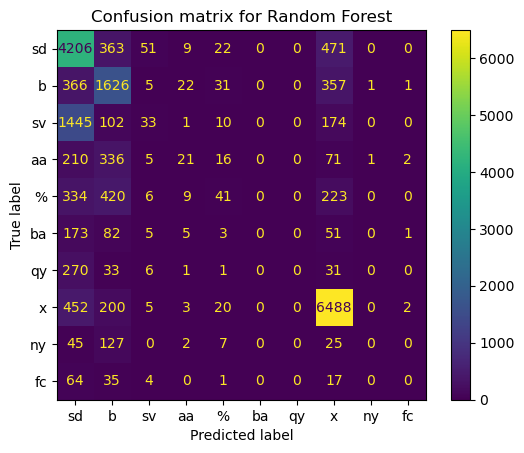

,Model,Accuracy,F1 Score
0,Random Forest,0.648303,0.225223
0,Random Forest,0.648303,0.225223


In [99]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(0)
results = pd.DataFrame(columns=['Model', 'Accuracy', 'F1 Score'])

models = {
    #'SVM': svm.SVC(),
    'Random Forest': RandomForestClassifier(),
    #'Logistic Regression': LogisticRegression(),
    #'Decision Tree': DecisionTreeClassifier()
}

X_train, X_test2, y_train, y_test2 = train_test_split(X, y, test_size=0.4, random_state=42)


for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    
    new_row = pd.DataFrame([{
        'Model': model_name,
        'Accuracy': accuracy,
        'F1 Score': f1,
    }])

    results = pd.concat([results, new_row], ignore_index=True)

    cm = confusion_matrix(y_test, y_pred, labels=["sd", "b", "sv", "aa", "%", "ba", "qy", "x", "ny", "fc"])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["sd", "b", "sv", "aa", "%", "ba", "qy", "x", "ny", "fc"])
    disp.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
    plt.title(f'Confusion matrix for {model_name}')
    plt.show()

average_results = results.groupby('Model').mean().reset_index()

results = pd.concat([results, average_results])
results


In [125]:
text_features_df = pd.read_csv('text_features_train.csv')
text_features_df = text_features_df[text_features_df['da_tag'].isin(["sd", "b", "sv", "aa", "%", "ba", "qy", "x", "ny", "fc"])]

text_valid_features_df = pd.read_csv('text_features_valid.csv')
text_valid_features_df = text_valid_features_df[text_valid_features_df['da_tag'].isin(["sd", "b", "sv", "aa", "%", "ba", "qy", "x", "ny", "fc"])]

text_test_features_df = pd.read_csv('text_features_test.csv')
#text_test_features_df = text_test_features_df[text_test_features_df['da_tag'].isin(["sd", "b", "sv", "aa", "%", "ba", "qy", "x", "ny", "fc"])]

In [127]:
text_test_features_df.reset_index(inplace=True)


In [128]:
text_test_features_df

,index,dialog_id,speaker,transcript,da_tag,start_time,end_time,function,pronoun,ppron,...,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler
0,0,sw2019,A,SIL,NaN,0.00000,2.92922,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
1,1,sw2019,B,SIL,NaN,0.00000,4.46754,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
2,2,sw2019,A,uh do you have a pet randy,NaN,2.92922,4.31867,0.571429,0.142857,0.142857,...,0.142857,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.142857,0.0
3,3,sw2019,A,SIL,NaN,4.31867,6.74838,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
4,4,sw2019,B,uh yeah,NaN,4.46754,5.01339,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.5,0.500000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23535,23535,sw4936,B,yeah,NaN,294.02342,294.43437,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,1.0,0.000000,0.0
23536,23536,sw4936,B,SIL,NaN,294.43437,297.07133,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
23537,23537,sw4936,A,SIL,NaN,296.74224,299.04000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
23538,23538,sw4936,B,yeah,NaN,297.07133,297.19119,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,1.0,0.000000,0.0


In [129]:
test_features_df

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,index,da_tag
0,29.624180,0.024166,28.921558,29.490440,30.259483,1.337925,4.988162,0.000000,12.944826,0.000000,...,0.022932,2.439024,2.941176,0.210000,0.000000,0.050000,0.010000,-37.562622,5101,NaN
1,31.515406,0.085495,28.928753,29.762682,34.366169,5.437416,41.192936,0.000000,-99.053490,0.000000,...,0.024057,2.777778,1.941748,0.055000,0.005000,0.290000,0.333567,-40.169373,16999,NaN
2,30.505522,0.053013,29.865196,30.525127,31.590313,1.725117,231.765991,432.320099,16.020430,19.341270,...,0.025541,3.235294,2.074074,0.147143,0.110546,0.315000,0.408634,-41.553226,9891,NaN
3,22.089834,0.146336,19.041187,20.762587,25.657866,6.616678,46.051498,8.948975,136.444717,0.000000,...,0.081936,3.306728,0.573394,0.074000,0.049639,1.373333,0.832980,-30.510845,23262,NaN
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.015100,1.721170,0.000000,0.000000,0.000000,5.750000,0.000000,-52.850620,23126,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23535,32.367092,0.089508,29.730940,31.889847,34.562206,4.831266,56.266502,47.312355,13.029498,4.619988,...,0.066116,4.055767,2.168367,0.135882,0.079117,0.287778,0.335916,-31.175224,5118,NaN
23536,34.126564,0.115225,31.172508,32.816284,36.090256,4.917747,190.155548,161.988403,24.450747,30.388372,...,0.021563,4.020101,2.871622,0.198824,0.125365,0.129412,0.111010,-38.279190,5364,NaN
23537,21.819513,0.003507,21.754604,21.822102,21.885460,0.130856,0.049664,0.000000,0.000000,0.000000,...,0.057994,7.142857,11.111112,0.030000,0.000000,0.040000,0.000000,-34.918400,22301,NaN
23538,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.014648,11.538462,0.000000,0.000000,0.000000,0.200000,0.000000,-49.347610,9632,NaN


In [34]:
text_features_df = text_features_df.dropna()
text_features_df.reset_index(inplace=True)

X1 = text_features_df.drop(['da_tag'], axis=1)
X = X1[['pronoun', 'ppron', 'i', 'you', 'cogproc', 'posemo', 'negemo', 'focuspast', 'focuspresent', 'social', 'interrog']]
y = text_features_df["da_tag"]

text_valid_features_df = text_valid_features_df.dropna()
X1_test = text_valid_features_df.drop(['da_tag'], axis=1)
X_test = X1_test[['pronoun', 'ppron', 'i', 'you', 'affect', 'posemo', 'negemo', 'focuspast', 'focuspresent', 'social', 'interrog']]
y_test = text_valid_features_df["da_tag"]


In [103]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(0)
results = pd.DataFrame(columns=['Model', 'Accuracy', 'F1 Score'])

models = {
    'SVM': svm.SVC(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier()
}

X_train, X_test2, y_train, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    
    new_row = pd.DataFrame([{
        'Model': model_name,
        'Accuracy': accuracy,
        'F1 Score': f1,
    }])

    results = pd.concat([results, new_row], ignore_index=True)

    #cm = confusion_matrix(y_test, y_pred, labels=["sd", "b", "sv", "aa", "%", "ba", "qy", "x", "ny", "fc"])
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["sd", "b", "sv", "aa", "%", "ba", "qy", "x", "ny", "fc"])
    #disp.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
    #plt.title(f'Confusion matrix for {model_name}')
    #plt.show()

average_results = results.groupby('Model').mean().reset_index()

results = pd.concat([results, average_results])
results


/var/folders/5b/tj4m2bpd28d2w787g3yz_0sr0000gn/T/ipykernel_14396/2158555080.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)
/Users/zarahall/miniconda3/envs/torch/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Accuracy,F1 Score
0,SVM,0.597911,0.101735
1,Random Forest,0.590098,0.107824
2,Logistic Regression,0.572300,0.054565
3,Decision Tree,0.554225,0.097497
0,Decision Tree,0.554225,0.097497
1,Logistic Regression,0.572300,0.054565
2,Random Forest,0.590098,0.107824
3,SVM,0.597911,0.101735


In [113]:
test_features_df.sort_index

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,index,da_tag
0,29.624180,0.024166,28.921558,29.490440,30.259483,1.337925,4.988162,0.000000,12.944826,0.000000,...,0.022932,2.439024,2.941176,0.210000,0.000000,0.050000,0.010000,-37.562622,5101,NaN
1,31.515406,0.085495,28.928753,29.762682,34.366169,5.437416,41.192936,0.000000,-99.053490,0.000000,...,0.024057,2.777778,1.941748,0.055000,0.005000,0.290000,0.333567,-40.169373,16999,NaN
2,30.505522,0.053013,29.865196,30.525127,31.590313,1.725117,231.765991,432.320099,16.020430,19.341270,...,0.025541,3.235294,2.074074,0.147143,0.110546,0.315000,0.408634,-41.553226,9891,NaN
3,22.089834,0.146336,19.041187,20.762587,25.657866,6.616678,46.051498,8.948975,136.444717,0.000000,...,0.081936,3.306728,0.573394,0.074000,0.049639,1.373333,0.832980,-30.510845,23262,NaN
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.015100,1.721170,0.000000,0.000000,0.000000,5.750000,0.000000,-52.850620,23126,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23535,32.367092,0.089508,29.730940,31.889847,34.562206,4.831266,56.266502,47.312355,13.029498,4.619988,...,0.066116,4.055767,2.168367,0.135882,0.079117,0.287778,0.335916,-31.175224,5118,NaN
23536,34.126564,0.115225,31.172508,32.816284,36.090256,4.917747,190.155548,161.988403,24.450747,30.388372,...,0.021563,4.020101,2.871622,0.198824,0.125365,0.129412,0.111010,-38.279190,5364,NaN
23537,21.819513,0.003507,21.754604,21.822102,21.885460,0.130856,0.049664,0.000000,0.000000,0.000000,...,0.057994,7.142857,11.111112,0.030000,0.000000,0.040000,0.000000,-34.918400,22301,NaN
23538,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.014648,11.538462,0.000000,0.000000,0.000000,0.200000,0.000000,-49.347610,9632,NaN


In [123]:
text_test_features_df

,dialog_id,speaker,transcript,da_tag,start_time,end_time,function,pronoun,ppron,i,...,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler


In [62]:
merged_df_train = pd.merge(features_df, text_features_df, on='index')
merged_df_train['da_tag_x']

0        ba
1         x
2        sd
3        sd
4        sv
         ..
70947     x
70948    sd
70949    ny
70950     b
70951     x
Name: da_tag_x, Length: 70952, dtype: object

In [43]:
merged_df_train.to_csv('speechtext_features_train.csv', index=False)


In [151]:
#text_test_features_df = text_test_features_df.sort_values(by='index')
test_features_df = test_features_df.sort_values(by='index')


In [154]:
merged_df_test = pd.concat([text_test_features_df, test_features_df], axis=1)

In [155]:
merged_df_test

,index,dialog_id,speaker,transcript,da_tag,start_time,end_time,function,pronoun,ppron,...,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,index,da_tag
0,0,sw2019,A,SIL,NaN,0.00000,2.92922,0.000000,0.000000,0.000000,...,0.022932,2.439024,2.941176,0.210000,0.000000,0.050000,0.010000,-37.562622,5101,NaN
1,1,sw2019,B,SIL,NaN,0.00000,4.46754,0.000000,0.000000,0.000000,...,0.024057,2.777778,1.941748,0.055000,0.005000,0.290000,0.333567,-40.169373,16999,NaN
2,2,sw2019,A,uh do you have a pet randy,NaN,2.92922,4.31867,0.571429,0.142857,0.142857,...,0.025541,3.235294,2.074074,0.147143,0.110546,0.315000,0.408634,-41.553226,9891,NaN
3,3,sw2019,A,SIL,NaN,4.31867,6.74838,0.000000,0.000000,0.000000,...,0.081936,3.306728,0.573394,0.074000,0.049639,1.373333,0.832980,-30.510845,23262,NaN
4,4,sw2019,B,uh yeah,NaN,4.46754,5.01339,0.000000,0.000000,0.000000,...,0.015100,1.721170,0.000000,0.000000,0.000000,5.750000,0.000000,-52.850620,23126,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23535,23535,sw4936,B,yeah,NaN,294.02342,294.43437,0.000000,0.000000,0.000000,...,0.066116,4.055767,2.168367,0.135882,0.079117,0.287778,0.335916,-31.175224,5118,NaN
23536,23536,sw4936,B,SIL,NaN,294.43437,297.07133,0.000000,0.000000,0.000000,...,0.021563,4.020101,2.871622,0.198824,0.125365,0.129412,0.111010,-38.279190,5364,NaN
23537,23537,sw4936,A,SIL,NaN,296.74224,299.04000,0.000000,0.000000,0.000000,...,0.057994,7.142857,11.111112,0.030000,0.000000,0.040000,0.000000,-34.918400,22301,NaN
23538,23538,sw4936,B,yeah,NaN,297.07133,297.19119,0.000000,0.000000,0.000000,...,0.014648,11.538462,0.000000,0.000000,0.000000,0.200000,0.000000,-49.347610,9632,NaN


In [156]:
merged_df_test.to_csv('speechtext_features_test.csv', index=False)


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(0)
results = pd.DataFrame(columns=['Model', 'Accuracy', 'F1 Score'])

models = {
    #'SVM': svm.SVC(),
    'Random Forest': RandomForestClassifier(),
    #'Logistic Regression': LogisticRegression(),
    #'Decision Tree': DecisionTreeClassifier()
}

X_train, X_test2, y_train, y_test2 = train_test_split(X, y, test_size=0.4, random_state=42)


for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    
    new_row = pd.DataFrame([{
        'Model': model_name,
        'Accuracy': accuracy,
        'F1 Score': f1,
    }])

    results = pd.concat([results, new_row], ignore_index=True)

    cm = confusion_matrix(y_test, y_pred, labels=["sd", "b", "sv", "aa", "%", "ba", "qy", "x", "ny", "fc"])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["sd", "b", "sv", "aa", "%", "ba", "qy", "x", "ny", "fc"])
    disp.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
    plt.title(f'Confusion matrix for {model_name}')
    plt.show()

average_results = results.groupby('Model').mean().reset_index()

results = pd.concat([results, average_results])
results


In [14]:
valid_index = pd.read_csv('valid_index.csv')
valid_index = valid_index[valid_index['da_tag'].isin(["sd", "b", "sv", "aa", "%", "ba", "qy", "x", "ny", "fc"])]

valid_features_df = pd.concat([valid_index, valid_features_df], axis=1)
valid_features_df = valid_features_df.sort_values(by='index')



In [30]:
text_valid_features_df_reset = text_valid_features_df.reset_index(drop=True)
valid_features_df_reset = valid_features_df.reset_index(drop=True)

merged_df = pd.concat([text_valid_features_df_reset, valid_features_df_reset], axis=1)

merged_df.to_csv('speechtext_features_valid.csv', index=False)


In [46]:
merged_df_train

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler
0,36.200424,0.043495,34.375710,36.088116,37.967987,3.592277,17.475294,0.000000,-21.937563,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
2,24.202183,0.178240,22.007040,22.448004,22.885040,0.878000,42.089283,0.000000,-3.388310,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
3,32.942630,0.043121,31.553380,32.993180,34.118538,2.565159,126.495895,137.481840,20.105566,11.268894,...,0.0,0.181818,0.0,0.0,0.090909,0.0,0.0,0.0,0.090909,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70947,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
70948,26.932869,0.274892,21.385347,23.220718,38.860554,17.475206,277.051030,26.628067,76.362520,59.348450,...,0.0,0.000000,0.0,0.0,0.125000,0.0,0.0,0.0,0.125000,0.0
70949,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,1.000000,0.0,0.0,1.0,0.000000,0.0
70950,32.110160,0.009442,31.823614,32.179604,32.360374,0.536760,7.673693,0.790012,10.360754,0.415170,...,0.0,0.000000,0.0,0.0,1.000000,0.0,0.0,1.0,0.000000,0.0


In [47]:
features_df

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,index,da_tag
0,36.200424,0.043495,34.375710,36.088116,37.967987,3.592277,17.475294,0.000000,-21.937563,0.000000,...,0.020036,6.666666,2.857143,0.1350,0.075000,0.195000,0.035000,-44.940960,74513,ba
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.012445,9.090909,0.000000,0.0000,0.000000,0.380000,0.000000,-42.512630,45545,x
2,24.202183,0.178240,22.007040,22.448004,22.885040,0.878000,42.089283,0.000000,-3.388310,0.000000,...,0.035088,4.950495,4.166667,0.0725,0.032692,0.116000,0.068000,-37.027000,9121,sd
3,32.942630,0.043121,31.553380,32.993180,34.118538,2.565159,126.495895,137.481840,20.105566,11.268894,...,0.020627,3.853565,2.140078,0.1700,0.135378,0.277273,0.237452,-37.188175,15154,sd
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.035905,6.451613,0.000000,0.0000,0.000000,0.250000,0.000000,-41.440575,52822,sv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70947,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.013972,1.724138,0.000000,0.0000,0.000000,2.260000,0.000000,-53.483160,72724,x
70948,26.932869,0.274892,21.385347,23.220718,38.860554,17.475206,277.051030,26.628067,76.362520,59.348450,...,0.062355,4.366812,1.785714,0.0700,0.053385,0.465000,0.297447,-32.789310,68533,sd
70949,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.171695,8.333334,0.000000,0.0000,0.000000,0.180000,0.000000,-28.115456,57043,ny
70950,32.110160,0.009442,31.823614,32.179604,32.360374,0.536760,7.673693,0.790012,10.360754,0.415170,...,0.043438,2.857143,3.333334,0.2100,0.000000,0.070000,0.000000,-30.939310,35817,b


In [189]:
merged_df_train= merged_df_train.dropna()

X = merged_df_train.drop(['da_tag_x'], axis=1)
X = X.drop(['da_tag_y'], axis=1)
X = X.drop(['dialog_id'], axis=1)
y = merged_df_train['da_tag_x']

merged_df = merged_df_test.dropna()
X_test = merged_df_test.drop(['da_tag'], axis=1)
#X_test = X_test_tes.drop(['dialog_id'], axis=1)
#y_test = merged_df["da_tag"]


In [182]:
X_test

,index,dialog_id,speaker,transcript,start_time,end_time,function,pronoun,ppron,i,...,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,index
0,0,sw2019,A,SIL,0.00000,2.92922,0.000000,0.000000,0.000000,0.0,...,0.023732,0.022932,2.439024,2.941176,0.210000,0.000000,0.050000,0.010000,-37.562622,5101
1,1,sw2019,B,SIL,0.00000,4.46754,0.000000,0.000000,0.000000,0.0,...,0.011198,0.024057,2.777778,1.941748,0.055000,0.005000,0.290000,0.333567,-40.169373,16999
2,2,sw2019,A,uh do you have a pet randy,2.92922,4.31867,0.571429,0.142857,0.142857,0.0,...,0.013964,0.025541,3.235294,2.074074,0.147143,0.110546,0.315000,0.408634,-41.553226,9891
3,3,sw2019,A,SIL,4.31867,6.74838,0.000000,0.000000,0.000000,0.0,...,0.001842,0.081936,3.306728,0.573394,0.074000,0.049639,1.373333,0.832980,-30.510845,23262
4,4,sw2019,B,uh yeah,4.46754,5.01339,0.000000,0.000000,0.000000,0.0,...,0.047113,0.015100,1.721170,0.000000,0.000000,0.000000,5.750000,0.000000,-52.850620,23126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23535,23535,sw4936,B,yeah,294.02342,294.43437,0.000000,0.000000,0.000000,0.0,...,0.011453,0.066116,4.055767,2.168367,0.135882,0.079117,0.287778,0.335916,-31.175224,5118
23536,23536,sw4936,B,SIL,294.43437,297.07133,0.000000,0.000000,0.000000,0.0,...,0.018680,0.021563,4.020101,2.871622,0.198824,0.125365,0.129412,0.111010,-38.279190,5364
23537,23537,sw4936,A,SIL,296.74224,299.04000,0.000000,0.000000,0.000000,0.0,...,0.001619,0.057994,7.142857,11.111112,0.030000,0.000000,0.040000,0.000000,-34.918400,22301
23538,23538,sw4936,B,yeah,297.07133,297.19119,0.000000,0.000000,0.000000,0.0,...,0.012929,0.014648,11.538462,0.000000,0.000000,0.000000,0.200000,0.000000,-49.347610,9632


In [193]:
common_columns = list(set(X.columns).intersection(set(X_test.columns)))
X = X[common_columns]
X_test = X_test[common_columns]


In [197]:
X = X.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])


In [84]:
X = X.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])


In [194]:
X_test = X_test.loc[:,~X_test.columns.duplicated()]


In [198]:
X_test

,cogproc,mfcc2V_sma3nz_stddevNorm,compare,HNRdBACF_sma3nz_amean,F1amplitudeLogRelF0_sma3nz_amean,start_time,see,pronoun,verb,StddevVoicedSegmentLengthSec,...,friend,achieve,reward,F2amplitudeLogRelF0_sma3nz_amean,end_time,i,spectralFluxUV_sma3nz_amean,social,affiliation,relig
0,0.0,-1.853076,0.0,3.441934,-74.692940,0.00000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,-72.630898,2.92922,0.0,0.022932,0.000000,0.0,0.0
1,0.0,-0.751725,0.0,2.861406,-175.725586,0.00000,0.0,0.000000,0.000000,0.005000,...,0.0,0.0,0.0,-175.183136,4.46754,0.0,0.024057,0.000000,0.0,0.0
2,0.0,-2.448897,0.0,5.993117,-133.951248,2.92922,0.0,0.142857,0.285714,0.110546,...,0.0,0.0,0.0,-136.537766,4.31867,0.0,0.025541,0.142857,0.0,0.0
3,0.0,4.441057,0.0,4.015212,-191.181229,4.31867,0.0,0.000000,0.000000,0.049639,...,0.0,0.0,0.0,-191.915451,6.74838,0.0,0.081936,0.000000,0.0,0.0
4,0.0,0.000000,0.0,0.000000,-201.000000,4.46754,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,-201.000000,5.01339,0.0,0.015100,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23535,0.0,-12.653480,0.0,6.098753,-140.051712,294.02342,0.0,0.000000,0.000000,0.079117,...,0.0,0.0,0.0,-139.545074,294.43437,0.0,0.066116,0.000000,0.0,0.0
23536,0.0,-3.613096,0.0,7.176260,-83.669922,294.43437,0.0,0.000000,0.000000,0.125365,...,0.0,0.0,0.0,-83.629936,297.07133,0.0,0.021563,0.000000,0.0,0.0
23537,0.0,-0.133066,0.0,4.506469,-101.033501,296.74224,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,-100.280655,299.04000,0.0,0.057994,0.000000,0.0,0.0
23538,0.0,0.000000,0.0,0.000000,-201.000000,297.07133,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,-201.000000,297.19119,0.0,0.014648,0.000000,0.0,0.0


In [183]:
print(X_test[X_test.isna().any(axis=1)])

X_test = X_test.dropna()


       index dialog_id speaker  \
475      475    sw2020       B   
2296    2296    sw2137       B   
5532    5532    sw2393       A   
16466  16466    sw3798       A   
17993  17993    sw3926       A   
23019  23019    sw4759       A   
23310  23310    sw4908       A   

                                              transcript  start_time  \
475    i think that probably what did it for him was ...   317.89511   
2296               well but the the issue of of of which   154.44000   
5532                                                 SIL    68.73608   
16466                                             uh-huh   246.64507   
17993                                                SIL   238.09563   
23019                                                SIL   242.05494   
23310                                                SIL   277.32673   

        end_time  function   pronoun     ppron         i  ...  \
475    322.53987  0.736842  0.368421  0.157895  0.052632  ...   
2296   158.80616  0.

In [180]:
X_test

,index,dialog_id,speaker,transcript,start_time,end_time,function,pronoun,ppron,i,...,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,index
0,0,sw2019,A,SIL,0.00000,2.92922,0.000000,0.000000,0.000000,0.0,...,0.023732,0.022932,2.439024,2.941176,0.210000,0.000000,0.050000,0.010000,-37.562622,5101
1,1,sw2019,B,SIL,0.00000,4.46754,0.000000,0.000000,0.000000,0.0,...,0.011198,0.024057,2.777778,1.941748,0.055000,0.005000,0.290000,0.333567,-40.169373,16999
2,2,sw2019,A,uh do you have a pet randy,2.92922,4.31867,0.571429,0.142857,0.142857,0.0,...,0.013964,0.025541,3.235294,2.074074,0.147143,0.110546,0.315000,0.408634,-41.553226,9891
3,3,sw2019,A,SIL,4.31867,6.74838,0.000000,0.000000,0.000000,0.0,...,0.001842,0.081936,3.306728,0.573394,0.074000,0.049639,1.373333,0.832980,-30.510845,23262
4,4,sw2019,B,uh yeah,4.46754,5.01339,0.000000,0.000000,0.000000,0.0,...,0.047113,0.015100,1.721170,0.000000,0.000000,0.000000,5.750000,0.000000,-52.850620,23126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23535,23535,sw4936,B,yeah,294.02342,294.43437,0.000000,0.000000,0.000000,0.0,...,0.011453,0.066116,4.055767,2.168367,0.135882,0.079117,0.287778,0.335916,-31.175224,5118
23536,23536,sw4936,B,SIL,294.43437,297.07133,0.000000,0.000000,0.000000,0.0,...,0.018680,0.021563,4.020101,2.871622,0.198824,0.125365,0.129412,0.111010,-38.279190,5364
23537,23537,sw4936,A,SIL,296.74224,299.04000,0.000000,0.000000,0.000000,0.0,...,0.001619,0.057994,7.142857,11.111112,0.030000,0.000000,0.040000,0.000000,-34.918400,22301
23538,23538,sw4936,B,yeah,297.07133,297.19119,0.000000,0.000000,0.000000,0.0,...,0.012929,0.014648,11.538462,0.000000,0.000000,0.000000,0.200000,0.000000,-49.347610,9632


In [201]:
#code for predicting test vals 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(0)
results = pd.DataFrame(columns=['Model', 'Accuracy', 'F1 Score'])

models = {
    #'SVM': svm.SVC(),
    'Random Forest': RandomForestClassifier(),
    #'Logistic Regression': LogisticRegression(),
    #'Decision Tree': DecisionTreeClassifier()
}

X_train, X_test2, y_train, y_test2 = train_test_split(X, y, test_size=0.05, random_state=42)


for model_name, model in models.items():
    model.fit(X_train, y_train)
    X_test_filled = X_test.fillna(0)  
    y_pred = model.predict(X_test_filled)
    

  



In [203]:
np.savetxt("y_pred.csv", y_pred, delimiter=",", fmt='%s')


In [176]:
X_test

,cogproc,mfcc2V_sma3nz_stddevNorm,compare,HNRdBACF_sma3nz_amean,F1amplitudeLogRelF0_sma3nz_amean,start_time,see,pronoun,verb,StddevVoicedSegmentLengthSec,...,friend,achieve,reward,F2amplitudeLogRelF0_sma3nz_amean,end_time,i,spectralFluxUV_sma3nz_amean,social,affiliation,relig
0,0.0,-1.853076,0.0,3.441934,-74.692940,0.00000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,-72.630898,2.92922,0.0,0.022932,0.000000,0.0,0.0
1,0.0,-0.751725,0.0,2.861406,-175.725586,0.00000,0.0,0.000000,0.000000,0.005000,...,0.0,0.0,0.0,-175.183136,4.46754,0.0,0.024057,0.000000,0.0,0.0
2,0.0,-2.448897,0.0,5.993117,-133.951248,2.92922,0.0,0.142857,0.285714,0.110546,...,0.0,0.0,0.0,-136.537766,4.31867,0.0,0.025541,0.142857,0.0,0.0
3,0.0,4.441057,0.0,4.015212,-191.181229,4.31867,0.0,0.000000,0.000000,0.049639,...,0.0,0.0,0.0,-191.915451,6.74838,0.0,0.081936,0.000000,0.0,0.0
4,0.0,0.000000,0.0,0.000000,-201.000000,4.46754,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,-201.000000,5.01339,0.0,0.015100,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23535,0.0,-12.653480,0.0,6.098753,-140.051712,294.02342,0.0,0.000000,0.000000,0.079117,...,0.0,0.0,0.0,-139.545074,294.43437,0.0,0.066116,0.000000,0.0,0.0
23536,0.0,-3.613096,0.0,7.176260,-83.669922,294.43437,0.0,0.000000,0.000000,0.125365,...,0.0,0.0,0.0,-83.629936,297.07133,0.0,0.021563,0.000000,0.0,0.0
23537,0.0,-0.133066,0.0,4.506469,-101.033501,296.74224,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,-100.280655,299.04000,0.0,0.057994,0.000000,0.0,0.0
23538,0.0,0.000000,0.0,0.000000,-201.000000,297.07133,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,-201.000000,297.19119,0.0,0.014648,0.000000,0.0,0.0


In [173]:
pd.DataFrame(y_pred).to_csv('test_predictions.csv', index=False)


/var/folders/5b/tj4m2bpd28d2w787g3yz_0sr0000gn/T/ipykernel_39201/2053260973.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


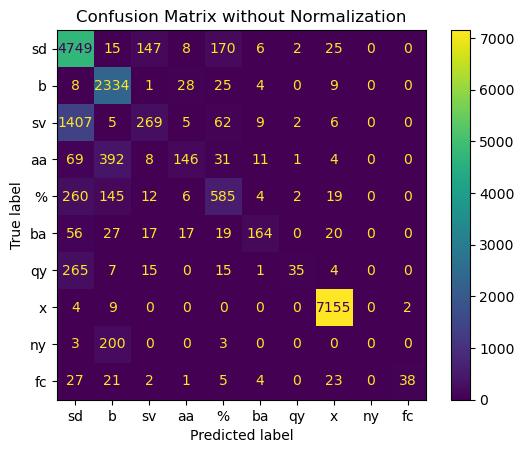

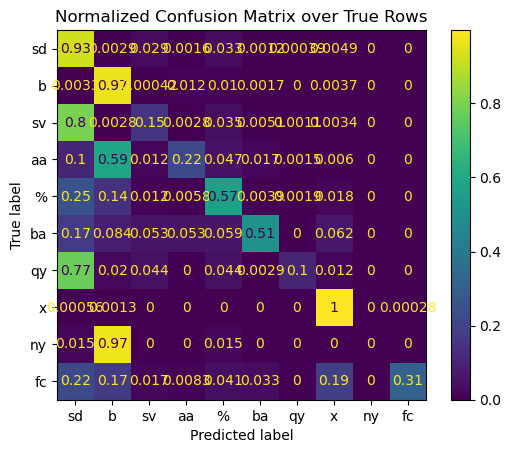

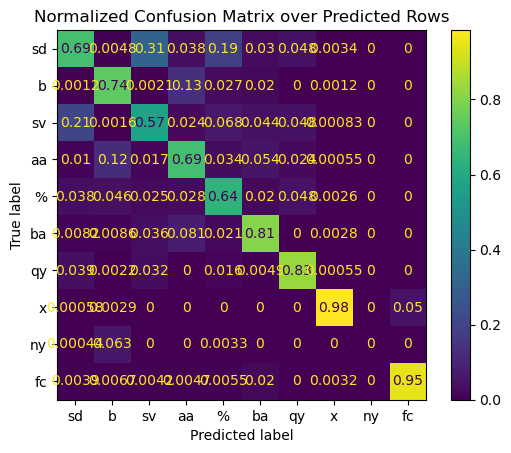

,Model,Accuracy,F1 Score
0,Random Forest,0.808094,0.508098
0,Random Forest,0.808094,0.508098


In [112]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(0)
results = pd.DataFrame(columns=['Model', 'Accuracy', 'F1 Score'])

models = {
    #'SVM': svm.SVC(),
    'Random Forest': RandomForestClassifier(),
    #'Logistic Regression': LogisticRegression(),
    #'Decision Tree': DecisionTreeClassifier()
}

X_train, X_test2, y_train, y_test2 = train_test_split(X, y, test_size=0.05, random_state=42)


for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    
    new_row = pd.DataFrame([{
        'Model': model_name,
        'Accuracy': accuracy,
        'F1 Score': f1,
    }])

    results = pd.concat([results, new_row], ignore_index=True)

    labels = ["sd", "b", "sv", "aa", "%", "ba", "qy", "x", "ny", "fc"]
    matrix = confusion_matrix(y_test, y_pred, labels=labels)
    norm_true = confusion_matrix(y_test, y_pred, labels=labels, normalize='true')
    norm_pred = confusion_matrix(y_test, y_pred, labels=labels, normalize='pred')

    disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=labels)
    disp.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
    plt.title('Confusion Matrix without Normalization')
    plt.show()

    disp_norm_true = ConfusionMatrixDisplay(confusion_matrix=norm_true, display_labels=labels)
    disp_norm_true.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
    plt.title('Normalized Confusion Matrix over True Rows')
    plt.show()

    disp_norm_pred = ConfusionMatrixDisplay(confusion_matrix=norm_pred, display_labels=labels)
    disp_norm_pred.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
    plt.title('Normalized Confusion Matrix over Predicted Rows')
    plt.show()

average_results = results.groupby('Model').mean().reset_index()

results = pd.concat([results, average_results])
results


In [97]:
y_pred

array(['x', 'x', 'b', ..., 'x', 'b', 'x'], dtype=object)

In [102]:
y_test = y_test.loc[:,~y_test.columns.duplicated()]


In [103]:
y_test

,da_tag
0,x
1,x
2,%
3,b
4,x
...,...
19151,x
19152,sv
19153,x
19154,b
